## Занятие 2. Pytorch туториал

In [1]:
! python -V

Python 3.9.7


In [2]:
! pip show torch

Name: torch
Version: 1.10.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/alexander/computerScience/ide/anaconda3/lib/python3.9/site-packages
Requires: typing-extensions
Required-by: torchvision, torchaudio, timm, pretrainedmodels, efficientnet-pytorch


In [3]:
import torch
import numpy as np

#### 1.1 Тензоры: создание и свойства

In [4]:
# создание тензоров
print(
    torch.zeros((2, 3)), 
)

print(
    torch.ones((3, 1)),
)

print(
    torch.rand((1, 2))
)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1.],
        [1.],
        [1.]])
tensor([[0.5592, 0.7577]])


In [5]:
# создание тензоров
print(
    torch.tensor(42),
)

print(
    torch.tensor(np.random.rand(1, 2))
)

tensor(42)
tensor([[0.6308, 0.5090]], dtype=torch.float64)


In [6]:
t = torch.zeros((3, 2)) + 0.9
t.dtype

torch.float32

In [7]:
print(
    t.double().dtype, 
    t.long().dtype
)

t, t.long()

torch.float64 torch.int64


(tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.9000, 0.9000]]),
 tensor([[0, 0],
         [0, 0],
         [0, 0]]))

In [8]:
# форма тензора 
t.shape, t.size()

(torch.Size([3, 2]), torch.Size([3, 2]))

In [9]:
t.device

device(type='cpu')

In [10]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)
t = t.to(device)
t

cuda:0


tensor([[0.9000, 0.9000],
        [0.9000, 0.9000],
        [0.9000, 0.9000]], device='cuda:0')

In [11]:
# копирование тензора - с формой, типом, девайсом
t, t.clone()

(tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.9000, 0.9000]], device='cuda:0'),
 tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.9000, 0.9000]], device='cuda:0'))

#### 1.2 Тензоры: индексация и изменение формы

In [12]:
t = torch.arange(18, device=device)
t

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       device='cuda:0')

In [13]:
# интерпретация массива как многомерного тензора
t.view((2, 3, 3))

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]], device='cuda:0')

In [14]:
# можно сделать "срез" тензора также, как и в numpy
t_slice = t.view((2, 3, 3))[:, 1:, :]
t_slice

tensor([[[ 3,  4,  5],
         [ 6,  7,  8]],

        [[12, 13, 14],
         [15, 16, 17]]], device='cuda:0')

In [15]:
# булевая индексация
t_slice[t_slice % 2 == 0]

tensor([ 4,  6,  8, 12, 14, 16], device='cuda:0')

In [16]:
# превращение boolean маски - в список индексов True 
(t_slice % 2 == 0).nonzero()

tensor([[0, 0, 1],
        [0, 1, 0],
        [0, 1, 2],
        [1, 0, 0],
        [1, 0, 2],
        [1, 1, 1]], device='cuda:0')

In [17]:
# numel и nelement - количество элементов в тензоре
print(
    t_slice.numel(), 
    t_slice.nelement()    
)

12 12


In [18]:
# len возвращает не количество элементов, а длину первой оси
print(
    t_slice.shape,
    len(t_slice)
)

torch.Size([2, 2, 3]) 2


In [19]:
t_slice.shape

torch.Size([2, 2, 3])

In [20]:
# устанавливаем новый порядок всех осей
t_slice_permute = t_slice.permute(0, 2, 1)
print(t_slice_permute)
print(t_slice_permute.shape)

tensor([[[ 3,  6],
         [ 4,  7],
         [ 5,  8]],

        [[12, 15],
         [13, 16],
         [14, 17]]], device='cuda:0')
torch.Size([2, 3, 2])


In [21]:
# меняем местами две оси
t_slice_tr = t_slice.transpose(1, 2)
print(t_slice)
print(t_slice_tr)

tensor([[[ 3,  4,  5],
         [ 6,  7,  8]],

        [[12, 13, 14],
         [15, 16, 17]]], device='cuda:0')
tensor([[[ 3,  6],
         [ 4,  7],
         [ 5,  8]],

        [[12, 15],
         [13, 16],
         [14, 17]]], device='cuda:0')


In [22]:
print(t_slice) 
print(t_slice.numel())

tensor([[[ 3,  4,  5],
         [ 6,  7,  8]],

        [[12, 13, 14],
         [15, 16, 17]]], device='cuda:0')
12


In [23]:
torch.arange(9).reshape((3,3)).is_contiguous()

True

================================================================================
### **Вопрос-1**: что получится при исполнении строчки ниже?

In [24]:
# t_slice.reshape(12)
#.contiguous().view(12)
#.view( t_slice.numel() )

================================================================================


### 1.3 Тензоры: объединение и разделение

In [25]:
# cat = concatenate
t2 = torch.cat([
    torch.zeros((1, 3, 3)),
    torch.ones((1, 3, 3))
], dim=2)

print(t2.shape)
t2.shape

torch.Size([1, 3, 6])


torch.Size([1, 3, 6])

In [26]:
t2.is_contiguous()

True

In [27]:
t2.shape

torch.Size([1, 3, 6])

In [28]:
# ~un-concatenate вдоль оси
torch.unbind(t2, dim=2)[0]

tensor([[0., 0., 0.]])

In [29]:
# ~un-concatenate вдоль оси на произвольные фрагменты
torch.split(t2, [2, 4], dim=2)[1].shape

torch.Size([1, 3, 4])

In [30]:
# "найди отличие" от concatenate?

t3 = torch.stack([
    torch.zeros((1, 3, 3)),
    torch.ones((1, 3, 3))
])
print(t3)

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])


### 1.4 Тензоры: broadcast

In [31]:
# "единичные" оси можно убирать
print(
    t3.shape, 
    t3.squeeze(2).shape
)

torch.Size([2, 1, 3, 3]) torch.Size([2, 1, 3, 3])


In [32]:
# "единичные" оси можно добавлять
t2.shape, t2.unsqueeze(3).shape

(torch.Size([1, 3, 6]), torch.Size([1, 3, 6, 1]))

In [33]:
# вдоль единичныз осей для операций срабатывает broadcast, аналогично numpy
a = torch.arange(3)
b = torch.arange(6)

a.unsqueeze(0) - b.unsqueeze(1)

tensor([[ 0,  1,  2],
        [-1,  0,  1],
        [-2, -1,  0],
        [-3, -2, -1],
        [-4, -3, -2],
        [-5, -4, -3]])

================================================================================
### **Задачка-1**
Даны два набора 64-мерных векторов: A\[ N, 64 \] и B\[ M, 64 \]

Надо найти i и j такие, что скалярное произведение (A\[ i \], B\[ j \]) максимально.

Решение должно работать для батчей A и B.

In [34]:
t3.shape

torch.Size([2, 1, 3, 3])

In [35]:
torch.manual_seed(26092022)

a = torch.rand((2, 3, 64)) - 0.5
b = torch.randn((2, 13, 64))

#####
print(a.shape, a[:, :, None].shape)
print(b.shape, b[:, None].shape)
print( (a[:, :, None] * b[:, None]).shape)

dot_product = (a[:, :, None] * b[:, None]).sum(dim=-1)
#####

assert dot_product.shape == (2, 3, 13)

max_val, max_flat_index = torch.max(
    dot_product.view((2, -1)), dim=-1
)
print(f"Per batch max values:\n{max_val}")
print(f"\nPer batch max indices:\n{(dot_product == max_val.view((2, 1, 1))).nonzero()}")

torch.Size([2, 3, 64]) torch.Size([2, 3, 1, 64])
torch.Size([2, 13, 64]) torch.Size([2, 1, 13, 64])
torch.Size([2, 3, 13, 64])
Per batch max values:
tensor([4.3720, 5.8092])

Per batch max indices:
tensor([[0, 2, 6],
        [1, 2, 1]])


================================================================================

### 2.1 Модули: интерфейс и параметры

In [36]:
from torch import nn


class SoftmaxWithT(nn.Module):
    """
    exp(a*b) = exp(a) + exp(b)
    y[b, i] = exp( x[b,i] / T ) / Sum[j]( exp(x[b, j] / T ) )
    """
    def __init__(self, temperature=1.0):
        super().__init__() # не забывайте вызывать родительский конструктор!
        # param
        self.t = nn.Parameter(torch.tensor([temperature]))

    def forward(self, x: torch.Tensor):
        norm = torch.max(x, dim=-1, keepdims=True)[0]
        x = x - norm
        
        numer = torch.exp(x / self.t)
        denom = torch.sum(numer, axis=-1, keepdims=True)
        return numer / denom
        
sm = SoftmaxWithT()

In [37]:
t =  torch.randn(2, 5)
print(sm(t))
print(torch.nn.functional.softmax(t, dim=-1))

tensor([[0.4882, 0.0673, 0.1385, 0.1580, 0.1479],
        [0.1764, 0.1078, 0.0374, 0.2312, 0.4472]], grad_fn=<DivBackward0>)
tensor([[0.4882, 0.0673, 0.1385, 0.1580, 0.1479],
        [0.1764, 0.1078, 0.0374, 0.2312, 0.4472]])


### Вопрос-2. Как изменить SoftmaxWithT чтобы не было nan?

In [38]:
print(sm(
    (t * 100)
))
print(torch.nn.functional.softmax(t * 100, dim=-1))

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.9508e-41, 0.0000e+00, 0.0000e+00, 2.1891e-29, 1.0000e+00]],
       grad_fn=<DivBackward0>)
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.9508e-41, 0.0000e+00, 0.0000e+00, 2.1891e-29, 1.0000e+00]])


In [39]:
# Модули можно "отправлять" на device
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    t_gpu = t.to(device)
    # отправляются все parameters 
    sm_gpu = sm.to(device)
    y_gpu = sm_gpu(t_gpu)
    print(y_gpu)
else:
    print("Cuda is unavailable")

tensor([[0.4882, 0.0673, 0.1385, 0.1580, 0.1479],
        [0.1764, 0.1078, 0.0374, 0.2312, 0.4472]], device='cuda:0',
       grad_fn=<DivBackward0>)


### 2.2 Модули: стандартные компоненты

In [40]:
t = torch.randn((1, 3, 224, 224))

# Последовательность модулей
net = nn.Sequential(
    nn.BatchNorm2d(num_features=3),
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=2, padding=1),
    nn.ReLU()
)

net

Sequential(
  (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (2): ReLU()
)

### 2.3 Модули: градиенты

In [41]:
_t_data = (np.random.rand(2, 10) - 0.5) * 5

# Тензоры могут требовать, либо не требовать градиентов
t = torch.tensor(
    _t_data,
    requires_grad=True,
    device=device
)
t

tensor([[-0.8838, -0.0926, -1.2445, -1.2641,  0.4238, -0.5061,  0.4910,  2.3111,
         -0.8291, -0.1223],
        [ 1.4541, -1.2897, -1.5519, -2.3846, -0.6721,  2.0276,  1.6619,  1.2413,
         -1.2592,  0.5103]], device='cuda:0', dtype=torch.float64,
       requires_grad=True)

In [42]:
# при выполнении backward для всех* тензоров и параметров вычисляются градиенты (т.е. dL/dt)
y = sm(t)

y

tensor([[0.0242, 0.0534, 0.0169, 0.0166, 0.0895, 0.0353, 0.0957, 0.5909, 0.0256,
         0.0518],
        [0.1810, 0.0116, 0.0090, 0.0039, 0.0216, 0.3212, 0.2228, 0.1463, 0.0120,
         0.0704]], device='cuda:0', dtype=torch.float64,
       grad_fn=<DivBackward0>)

In [43]:
y[0, 0].backward()
t.grad

tensor([[ 0.0236, -0.0013, -0.0004, -0.0004, -0.0022, -0.0009, -0.0023, -0.0143,
         -0.0006, -0.0013],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000]], device='cuda:0', dtype=torch.float64)

In [44]:
# Вызов .grad.zero_() обнуляет градиент
t.grad.zero_()
print(t.grad)

# Присваивание None удаляет градиент
t.grad = None
print(t.grad)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0',
       dtype=torch.float64)
None


In [45]:
# градиенты накапливаются при каждом backward
# можно (но не обязательно!) делать backward не после каждого forward

for _ in range(10):
    y = sm(t)
    y[0, 0].backward()
t.grad

tensor([[ 0.2363, -0.0129, -0.0041, -0.0040, -0.0217, -0.0086, -0.0232, -0.1431,
         -0.0062, -0.0126],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000]], device='cuda:0', dtype=torch.float64)

In [46]:
t.grad = None

# Можно локально отключить вычисление градиентов - например на валидации 
# Для больших сетей это ускорит работу

with torch.no_grad():
    y = sm(t)    
    
    # Вызов backward приведет к ошибке
    # y[0, 0].backward()

print(t.grad)

None


In [47]:
list(sm.named_parameters())

[('t',
  Parameter containing:
  tensor([1.], device='cuda:0', requires_grad=True))]

In [48]:
sm.t.grad

tensor([0.5914], device='cuda:0')

In [49]:
sm.zero_grad()
sm.t.grad

tensor([0.], device='cuda:0')

In [50]:
# Не все операции дифференцируемы

class Argmax(nn.Module):
    def forward(self, x: torch.Tensor):
        return torch.argmax(x, dim=-1, keepdims=True)

    
net = nn.Sequential(
    SoftmaxWithT(),
    Argmax()
).to(device)
y = net(t)
y

tensor([[7],
        [5]], device='cuda:0')

In [51]:
y[0].backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

#### 3.1 ResNet: пишем блок

[1] Identity Mappings in Deep Residual Networks.
https://arxiv.org/abs/1603.05027

![resnet blocks were not loaded](resnet_blocks.png "Resnet Blocks[1]")

In [52]:
class ResidualBlock(nn.Module):
    def __init__(self, *, in_channels, out_channels, kernel_size, padding, stride, is_projection_shortcut=False):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, padding=padding, stride=stride),
            nn.BatchNorm2d(num_features=out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=kernel_size, padding=padding, stride=1),
            nn.BatchNorm2d(num_features=out_channels),
            nn.ReLU(),
        )
        if is_projection_shortcut:
            self.proj = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, stride=stride, kernel_size=1, padding=0)
        else:
            self.proj = lambda x: x

    def forward(self, x):
        y = self.net(x)
        z = self.proj(x)
        return y + z
        

_test_block = ResidualBlock(in_channels=16, out_channels=26, kernel_size=3, padding=1, stride=2, is_projection_shortcut=True)

t = torch.randn((1, 16, 96, 96))
y = _test_block(t)
y.shape

torch.Size([1, 26, 48, 48])

#### 3.2 ResNet: пишем сеть
[2] Deep Residual Learning for Image Recognition.
https://arxiv.org/abs/1512.03385


![resnet arch was not loaded](resnet_arch.png "Resnet Arch")

In [53]:
class ResidualNet18(nn.Module):
    def __init__(self, n_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding='same'),
            
            ResidualBlock(in_channels=64, out_channels=64, kernel_size=3, padding=1, stride=1, is_projection_shortcut=False),
            ResidualBlock(in_channels=64, out_channels=64, kernel_size=3, padding=1, stride=1, is_projection_shortcut=False),
            
            ResidualBlock(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=2, is_projection_shortcut=True),
            ResidualBlock(in_channels=128, out_channels=128, kernel_size=3, padding=1, stride=1, is_projection_shortcut=False),

            ResidualBlock(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=2, is_projection_shortcut=True),
            ResidualBlock(in_channels=256, out_channels=256, kernel_size=3, padding=1, stride=1, is_projection_shortcut=False),

            ResidualBlock(in_channels=256, out_channels=512, kernel_size=3, padding=1, stride=2, is_projection_shortcut=True),
            ResidualBlock(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1, is_projection_shortcut=False),
            
        )
        self.pooling  = lambda x: torch.mean(x.view(x.size(0), x.size(1), -1), dim=-1)
        self.head = nn.Sequential(
            nn.Linear(in_features=512, out_features=n_classes),
            # !!!!!
            nn.LogSoftmax(dim=-1)
            # !!!!!
        )
        
    def forward(self, x, return_featuremap=False): 
        """
        Args:
            x: Tensor[B, 3, H, W]
            return_featuremap: возвращать ли помимо классов выход последней свертки перед пулингом
        Returns:
            y: Tensor[B, N_classes]
        """
        y = self.net(x)
        y = self.pooling(y)
        cls_logits = self.head(y)
        if not return_featuremap:
            return cls_logits
        return cls_logits, y
        
_test_net = ResidualNet18(n_classes=10)
t = torch.randn(8, 3, 32, 32)
y, yf = _test_net(t, return_featuremap=True)

y.shape, yf.shape, sum(p.numel() for p in _test_net.parameters() if p.requires_grad)


(torch.Size([8, 10]), torch.Size([8, 512]), 11176842)

In [54]:
from torchvision.models import resnet18
_default_renset = resnet18()
sum(p.numel() for p in _default_renset.parameters() if p.requires_grad)

11689512

#### 3.3 ResNet: готови данные CIFAR10


In [55]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from tqdm import tqdm

In [57]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
data_path = Path().absolute()/ '..'/ '..'/ 'data'

batch_size = 100

trainset = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /home/alexander/computerScience/phystech/9sem/abbyy/course_cvdl/classes/c02/../../data/cifar-10-python.tar.gz to /home/alexander/computerScience/phystech/9sem/abbyy/course_cvdl/classes/c02/../../data
Files already downloaded and verified


In [58]:
plt.rcParams['figure.figsize'] = [18, 12]

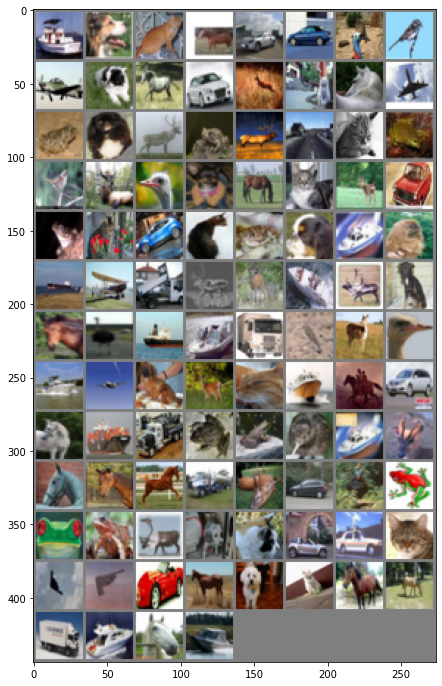

 ship   dog   cat horse   car   car  bird  bird plane   dog horse   car  deer   cat horse plane  frog   dog  deer  frog  deer truck   cat  frog  bird  deer  bird   dog horse   cat  deer   car  frog   cat   car   cat  frog   dog  ship   dog  ship plane truck  deer  deer  ship  deer   dog horse  bird  ship  ship truck  bird  deer  bird  ship plane   dog  deer   cat  ship horse   car horse  ship truck  frog  frog  bird  ship  deer horse horse horse truck  deer   car  bird  frog  frog  frog  deer   dog   cat   car   car   cat plane plane   car horse   dog   cat horse horse truck  ship horse  ship


In [59]:
def imshow(img):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

#### 3.4 ResNet: обучем на CIFAR10

In [60]:
model = ResidualNet18()

In [61]:
optimizer = torch.optim.SGD(model.parameters(), lr=5e-3)

In [62]:
criterion = torch.nn.NLLLoss()

In [63]:
n_print_loss = 100
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

model = model.to(device)

for epoch in range(1):
    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0), total=50000/batch_size):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % n_print_loss == (n_print_loss - 1): 
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

 20%|███████████████▊                                                               | 100/500.0 [00:22<01:30,  4.42it/s]

[1,   100] loss: 0.096


 40%|███████████████████████████████▌                                               | 200/500.0 [00:45<01:08,  4.41it/s]

[1,   200] loss: 0.081


 60%|███████████████████████████████████████████████▍                               | 300/500.0 [01:08<00:48,  4.15it/s]

[1,   300] loss: 0.075


 80%|███████████████████████████████████████████████████████████████▏               | 400/500.0 [01:32<00:23,  4.19it/s]

[1,   400] loss: 0.071


100%|███████████████████████████████████████████████████████████████████████████████| 500/500.0 [01:56<00:00,  4.31it/s]

[1,   500] loss: 0.068
Finished Training


#### 3.5 ResNet: замеряем качество

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
correct_labels = []
predicted_labels = []

model = model.to('cpu')

with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        predicted_labels = [*predicted_labels, *predictions]
        correct_labels = [*correct_labels, *labels]

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [01:05<00:00,  1.53it/s]


In [66]:
matrix = confusion_matrix(correct_labels, predicted_labels)

In [67]:
def plot_confusion_matrix(mtx, cls_names):
    fig, ax = plt.subplots()
    im = ax.imshow(mtx, cmap="seismic")
    
    try:
        ax.set_xticks(np.arange(len(cls_names)))
        ax.set_xticklabels(cls_names)
        ax.set_yticks(np.arange(len(cls_names)))
        ax.set_yticklabels(cls_names)
    except:
        # matplotlib api changed
        pass
        
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(cls_names)):
        for j in range(len(cls_names)):
            text = ax.text(j, i, mtx[i, j],
                           ha="center", va="center")
    
    acc = (np.eye(len(mtx)) * mtx).sum() / (mtx.sum() + 1e-4)
    ax.set_title(f"Confusion matrix CIFAR10. Accuracy: {acc * 100: .2f} %")
    fig.tight_layout()
    plt.show()

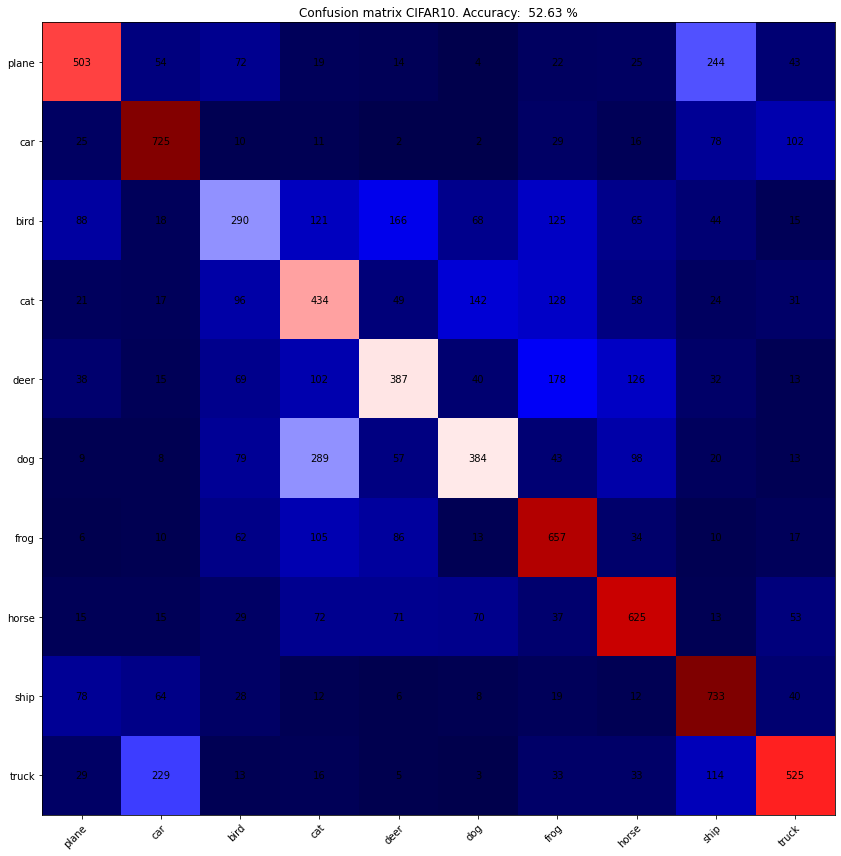

In [68]:
plot_confusion_matrix(matrix, classes)